Reinforcement Learning is a branch of Machine Learning, also called Online Learning. It is used to solve interacting problems where the data observed up to time t is considered to decide which action to take at time t + 1. It is also used for Artificial Intelligence when training machines to perform tasks such as walking. Desired outcomes provide the AI with reward, undesired with punishment. Machines learn through trial and error.

Example of a type of problem that can be solved with reinforcement learning: 
Multi-armed bandit problem (slot machine)

Different slot machine use different distributions, that you don't know in advance. 
Which is the best machine?
Trade-off: the more time you spend on 1 machine, the more money you lose ('regret') finding the correct slot machine.

Modern application: ads, what is the best ad for a certain product? (which generates the most clicks)
Option 1: take a very large sample, and explore the data to find the best ad.

###### Upper confidence bound (UCB) 

Step by step:

1. At each round 'n' consider two numbers for each ad 'i'
    - N_i(n) - number of times i was selected to be used up to round n
    - R_i(n) - sum of rewards of ad i up to round n
    
2. Calculate
    - The average reward of ad i op to round n: r_i = R_i(n)/N_i(n)
    - THe confidence interval at round n for ad i for this average reward: D_i(n) = sqrt(3/2 log(n)/N_i(n))

3. Show ad i which has the maximum UCB: r_i + D_i(n)

- For each experiment the bounds decrease, making sure all machines are used at a certain point. Once the confidence interval of the best machine is higher than that of the others, this machine is used and the best trade-off is found.

Good explanation in https://www.udemy.com/machinelearning/learn/v4/t/lecture/6456832?start=0 - at around 10min in the video.

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>


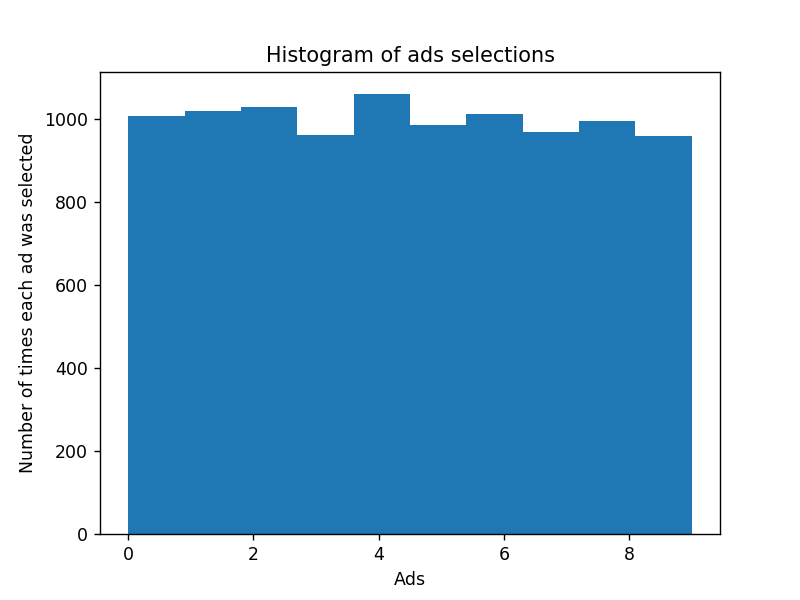

In [56]:
# Upper Confidence Bound

    # Importing the libraries

    #libraries
    %matplotlib notebook   
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import os

    # - Set path - 
    #convert to raw string and add an extra \ to the end (not to escape the string)
    dir = (r'C:\Users\msfernandez\Machine Learning A-Z\Machine Learning A-Z Template Folder\\Part 6 - Reinforcement Learning\Section 32 - Upper Confidence Bound (UCB)\\')
    os.chdir(dir)


    # - - - - - - - - - - - -
    # - import the dataset - 
    # - - - - - - - - - - - -
    dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
    display(dataset.head())

# What adds get the most clicks?

# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

22238
[0, 0, 0, 4, 4, 4, 4, 4, 4]
100000


<IPython.core.display.Javascript object>


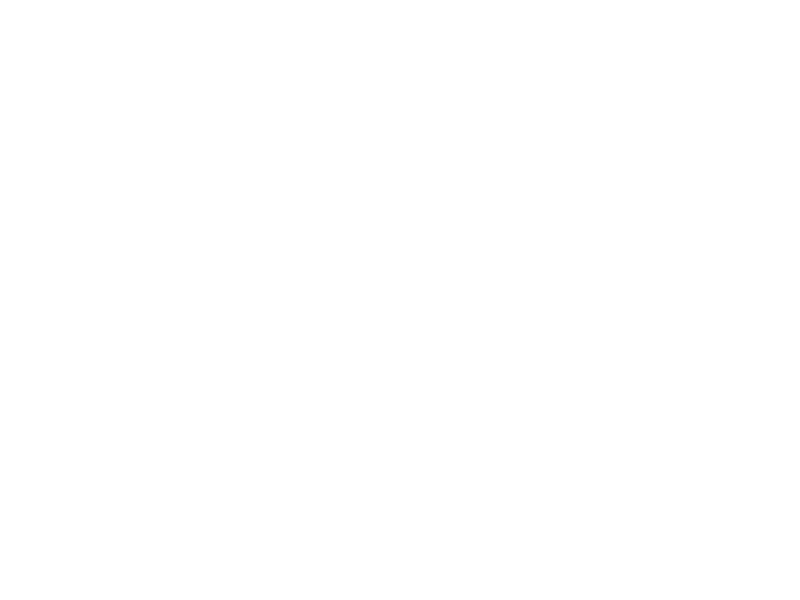

<IPython.core.display.Javascript object>


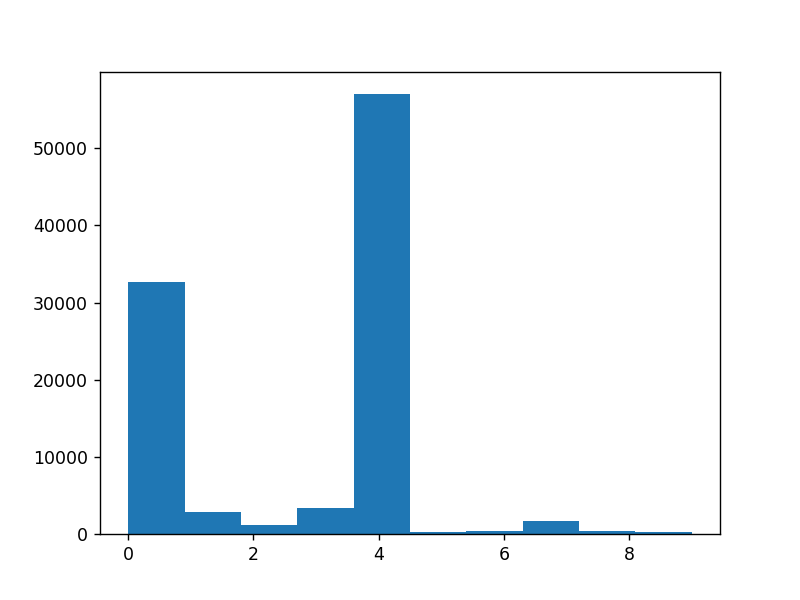

In [58]:
# Implement UCB algorithm
# Following the step by step process in the introdcution.
import math

N = 10000;
d = 10

number_of_selections = [0] * d
sums_of_rewards = [0]*d
ads_selected = []
total_reward = 0;

for n in range(0,N): #specific round
    ad = 0
    max_upper_bound = 0;
    for i in range(0,d): #specific ad
        
        if (number_of_selections[i] > 0):  # only start the UCB steps if all ads have been clicked once.
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        ads_selected.append(ad)
        number_of_selections[ad] += 1
        reward = dataset.values[n, ad]
        sums_of_rewards[ad] += reward #howmany times the ad was rewarded (1 or 0)
        total_reward += reward #total reward of our process.

print(total_reward)
print(ads_selected[-9:])

%matplotlib notebook   
print(len(ads_selected))
plt.scatter(range(0,len(ads_selected)),ads_selected)
plt.show()


%matplotlib notebook   
plt.hist(ads_selected)
plt.show()